In [ ]:
import pandas as pd

X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')

X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')

In [ ]:
print (X_train.head())

    Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0  LP001032   Male      No  ...              360              1         Urban
1  LP001824   Male     Yes  ...              480              1     Semiurban
2  LP002928   Male     Yes  ...              180              1     Semiurban
3  LP001814   Male     Yes  ...              360              1         Urban
4  LP002244   Male     Yes  ...              360              1         Urban

[5 rows x 12 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcfd344160>,
      dtype=object)

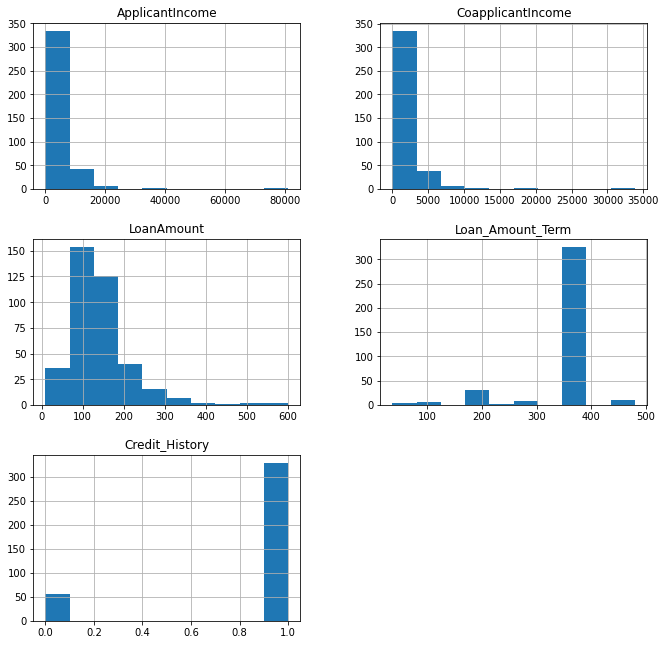

In [ ]:
import matplotlib.pyplot as plt

X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

print("\nShape of train set:", X_train.shape, Y_train.shape)
print("\nShape of test set:", X_test.shape, Y_test.shape)

# Initializing and Fitting a k-NN model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],Y_train.values.ravel())

# Checking the performance of our model on the testing data set
print("\nAccuracy score on test set :", accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History']])))

print("\nDistribution of Loan_Status in train set :")
print(Y_train.Target.value_counts()/Y_train.Target.count())

print("\nDistribution of Loan_Status in predictions on the test set :")
print(Y_test.Target.value_counts()/Y_test.Target.count())



Shape of train set: (384, 12) (384, 1)

Shape of test set: (96, 12) (96, 1)

Accuracy score on test set : 0.6145833333333334

Distribution of Loan_Status in train set :
Y    0.705729
N    0.294271
Name: Target, dtype: float64

Distribution of Loan_Status in predictions on the test set :
Y    0.635417
N    0.364583
Name: Target, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)

accuracy_score(Y_test,knn.predict(X_test_minmax))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.75

In [ ]:
# Standardizing the train and test data
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)

accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [ ]:
'''from sklearn.preprocessing import scale

X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)

accuracy_score(Y_test,log.predict(X_test_scale))'''

"from sklearn.preprocessing import scale\n\nX_train_scale=scale(X_train)\nX_test_scale=scale(X_test)\n\nlog=LogisticRegression(penalty='l2',C=.01)\nlog.fit(X_train_scale,Y_train)\n\naccuracy_score(Y_test,log.predict(X_test_scale))"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X_test.columns.values:
  if X_test[col].dtypes=='object':
      data=X_train[col].append(X_test[col])
      le.fit(data.values)
      X_train[col]=le.transform(X_train[col])
      X_test[col]=le.transform(X_test[col])

In [ ]:
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)

accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7395833333333334

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area']

for col in columns:
  data=X_train[[col]].append(X_test[[col]])
  enc.fit(data)
       
  temp = enc.transform(X_train[[col]])
  temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
  temp=temp.set_index(X_train.index.values)
       
  X_train_1=pd.concat([X_train_1,temp],axis=1)
       
  temp = enc.transform(X_test[[col]])       
  temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
  temp=temp.set_index(X_test.index.values)
       
  X_test_1=pd.concat([X_test_1,temp],axis=1)

In [ ]:
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)

log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)

accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

***********************************************************************

In [ ]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [ ]:
X_scaled.mean(axis=0)

X_scaled.std(axis=0)

array([1., 1., 1.])

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
scaler.mean_
scaler.scale_
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [ ]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [ ]:
min_max_scaler.scale_
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

max_abs_scaler.scale_

array([2., 1., 2.])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([4.3, 5.1, 5.8, 6.5, 7.9])

In [ ]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([0.01351351, 0.25112613, 0.47972973, 0.60472973, 0.94144144])

In [ ]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
X_lognormal

pt.fit_transform(X_lognormal)

array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863195, -0.57612415],
       [ 0.69420009, -0.84857822,  0.10051454]])

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[4.3, 2. , 1. , 0.1],
       [4.4, 2.2, 1.1, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.5, 2.3, 1.3, 0.1],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5.1, 2.7, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2

In [ ]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer(copy=True, norm='l2')

In [ ]:
normalizer.transform(X)
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

In [ ]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], 
     ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [ ]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari'],['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [ ]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])

X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

In [ ]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

In [ ]:
X = [['male', 'from US', 'uses Safari'],['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

In [ ]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [ ]:
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [ ]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer


binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
X = np.arange(9).reshape(3, 3)
X

poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)


array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [ ]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",category=UserWarning, append=False)

**************************************************************************************************

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))


[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [ ]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]
